# Dataset and its structure

1. Commonly known datasets that can be used for trianing purpose:
    1. Flickr8K
    2. Flick30K
    3. Fick100K
    4. MSCOCO
2. Each dataset may have there own structure of dataset. For Flickr_8K dataset, all the images of training, validation and test set are in one folder. It contains 3 different files i.e Flickr_8k.trainImages.txt, Flickr_8k.testImages.txt , Flickr_8k.devImages.txt  corresponding to each type of dataset i.e train, test and validation set, each file having file_name of images conatined in each dataset. 
3. For example, in Flick8k, Flickr_8k.trainImages.txt file contains file_ids of images in training set. Name of image file is its image id.
4. All the images are in same folder. So to parse images of training dataset, first read trianImages.txt file, read line by line image id and load corresponding image from image dataset folder.
5. Each image is given 5 different captions by 5 different humans. This is because an image can be described in multiple ways.
6. These captions are stored in 'Flickr8k.token.txt'. Each line of file contains a caption corresponding to an image. And for one image, there are 5 lines representing 5 captions for one image file.

# Research papers and resources to follow

1. https://arxiv.org/pdf/1411.4555.pdf
2. https://arxiv.org/pdf/1412.2306.pdf
3. https://www.youtube.com/watch?v=yCC09vCHzF8 (Video lecture by author of paper 2)
4. https://machinelearningmastery.com/develop-a-deep-learning-caption-generation-model-in-python/

# How can we define a single training example?

1. First thing that comes into mind is that how are we going to restructure our dataset in order to train it.
2. We are going to generate one word at a time inorder to generate complete sentence. To generate each word, we will provide 2 types of inputs.
    1. Image
    2. Sentence that has already been predicted.
3. How our training sample is going to look?
    1. We have to add 2 special tokens to each captions that represents start of sentence and end of sentence.
    2. Then we need to split each caption and image pair in multiple data samples.
    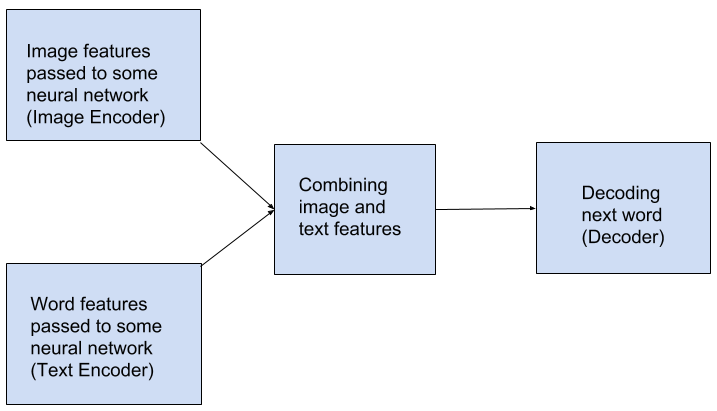
4. So corresponding to a single image and a caption, we are going to generate multiple data samples.

## Structure of a generic model for image captioning
https://arxiv.org/pdf/1703.09137.pdf
Depending upon the choice, your structure of model will change.
### Commonly used architecture
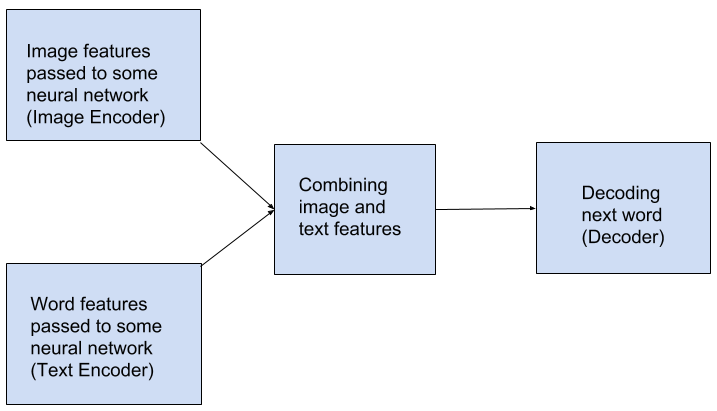

### Extracting image features
1. To extract image features, we can use CNN network. Either we can make our own CNN network or we can use concept of transfer learning. There are a lot of pre-trained models available to extract image features. For example, VGG16 model contains 16 layers which is used to classify image in 1 out of 1000 classes. Last layer of this model is used for classification, so we can capture the output of second last layer (which is a vector of size 4096 for a single image) as it will represent image features in form of numbers without classifying them in classes.
2. So, we can pass each image in our dataset through this network and store the results corresponding to image id in a file.
#### Q: Why are we extracting image features before training and storing them in files when we can extract them while training too?
Ans: For one image, there are 5 captions and each caption can have max length of 30-32 words (observation from dataset). So, for each image, no. of training samples can reach up to 5 * 32 = 160, and each time VGG model will generate same output as image is same. As, VGG16 model is quite a big model, we want to reduce this time by computing these features once and using them directly from dump file instead of using VGG model for each sample to predict image features.

### Providing text features

1. One very common way of defining our words features is that first we define our vocabulary and then one hot encode each word as a vector of vocab_size.
2. It has several drawbacks( see this https://www.youtube.com/watch?v=JKpm3DMSSMI and further few lectures to understand word embeddings completely) and thus we are going to use word embeddings to represent our words.
3. We will also need to define a maximum length which a sentence can take so that we could define size of our imputs because we are going to input a group of words to our model and expect a single word output.
4. For example, in Flickr8K dataset, maximum length of sentence is around 32. Let us say we have a map of words to integer as {"a": 1, "girl": 2, "running": 3, "near": 4}, so to encode a sentence 'a girl', we will make an array of size 32 (maximum length of sentence), put 1st two integers using word to index mapping as [1,2] and append this with zeros which represent no word. So, our input vector representing a word is going to look like [1,2,0,0,0,...] and so on of size 32. This input will be fed to a word embedding layer. 
5. We need not change each word to its corresponding one hot encoding as we are not using one hot encoded features. We are going to feed word to index mapping for each word of sentence to word embedding layer (let us say it has n units) and it will convert each word to n sized feature array. So, its input is a vector of size (max_length of sentence) and it will change this to (max_length_of_sentence,n).



### What is encoder in such models?

The neural networks that changes the any input in its features representation using vector of numbers is encoder. For example, we want to use image to predict words. As image directly can't tell what should be the word, we want to use its feature to help us decide the next word. And thus the network  of layers used to change image or any other type of input in its feature representation is known as encoders.

### What is decoder?

The combination of layers/neural network that takes feature representation provided by encoder as its own input and predicts the next word, is known as decoder.